<a href="https://colab.research.google.com/github/Valeria379/Data-Science/blob/main/%D0%9C%D0%BE%D1%80%D0%BE%D0%B7%D0%BE%D0%B2%D0%B0_%D0%92_HW3_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7%D1%8B_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 3. Описательная статистика


## Ваши данные
Заполните следующую информацию:

*Имя:Валерия
*Фамилия:Морозова
*Электронная почта:Morozova-VA@mgpu.ru


In [1]:
# imports and setup
import pandas as pd
import numpy as np
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Часть 3.1: Индекс качества воздуха SLC

В этой задаче изучить качество воздуха в Солт-Лейк-Сити.

### Задача 3.1.0. Узнайте об AQI

Прочтите об [индексе качества воздуха (AQI)](https://www.airnow.gov/aqi/aqi-basics) и
Система [AirNow](https://www.airnow.gov/about-airnow).


### Задача 3.1.1. Скачать данные
Агентство по охране окружающей среды предоставляет доступ к данным о качестве воздуха на веб-сайте AirData. Прочтите о данных, доступных на [этой информационной странице] (https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). Или скачайте файл `ad_viz_plotval_data.csv` в каталоге задания.


Перейдите на [website] (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) и загрузите следующие ежедневные данные:

+ Pollutant = PM2.5
+ Year = 2023
+ City = Salt Lake City, UT
+ Monitor Site = All Sites

### Задача 3.1.2. Импорт данных. Предобработка данных
Используйте функцию `pandas.read_csv()` для импорта данных.

Предупреждение: эти данные не соответствуют критериям качетсва:

+ Даты не сортируются.
+ Некоторые даты могут иметь пропущенные значения.
+ Некоторые даты могут иметь несколько значений, соответствующих разным датчикам (POC=1,2,3,4,5).

In [2]:
from google.colab import files
uploated = files.upload()

Saving ad_viz_plotval_data.csv to ad_viz_plotval_data.csv


In [3]:
daily_data=pd.read_csv('ad_viz_plotval_data.csv')

In [4]:
daily_data.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


In [5]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            6514 non-null   object 
 1   Source                          6514 non-null   object 
 2   Site ID                         6514 non-null   int64  
 3   POC                             6514 non-null   int64  
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64
 5   UNITS                           6514 non-null   object 
 6   DAILY_AQI_VALUE                 6514 non-null   int64  
 7   Site Name                       6514 non-null   object 
 8   DAILY_OBS_COUNT                 6514 non-null   int64  
 9   PERCENT_COMPLETE                6514 non-null   float64
 10  AQS_PARAMETER_CODE              6514 non-null   int64  
 11  AQS_PARAMETER_DESC              6514 non-null   object 
 12  CBSA_CODE                       65

In [6]:
#Получение сводной статистики для каждого столбца
daily_data.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,6.514000e+03,6514.000000,6514.000000,6514.000000,6514.0,6514.0,6514.0,6514.0,6514.0,6514.000000,6514.000000,6514.000000
mean,4.903637e+08,2.171323,7.243921,28.064784,1.0,100.0,88101.0,41620.0,49.0,36.105312,40.685918,-111.987452
std,3.041880e+04,1.259437,6.279512,19.298589,0.0,0.0,0.0,0.0,0.0,3.135747,0.097821,0.143387
min,4.903520e+08,1.000000,-0.500000,0.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.496392,-112.355780
25%,4.903530e+08,1.000000,3.800000,16.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.600550,-112.036298
50%,4.903530e+08,2.000000,5.700000,24.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.709762,-111.931000
75%,4.903530e+08,3.000000,7.900000,33.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.777145,-111.894167
max,4.904500e+08,5.000000,52.600000,143.000000,1.0,100.0,88101.0,41620.0,49.0,45.000000,40.807897,-111.872222


Даты представлены по типу данных как объект, нужно изменить тип

In [7]:
daily_data['Date'] = pd.to_datetime(daily_data['Date'])

In [8]:
#проверка на наличие нулевых значений
daily_data.isna().sum().sum()/len(daily_data)

0.0

In [9]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            6514 non-null   datetime64[ns]
 1   Source                          6514 non-null   object        
 2   Site ID                         6514 non-null   int64         
 3   POC                             6514 non-null   int64         
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64       
 5   UNITS                           6514 non-null   object        
 6   DAILY_AQI_VALUE                 6514 non-null   int64         
 7   Site Name                       6514 non-null   object        
 8   DAILY_OBS_COUNT                 6514 non-null   int64         
 9   PERCENT_COMPLETE                6514 non-null   float64       
 10  AQS_PARAMETER_CODE              6514 non-null   int64         
 11  AQS_

Данные проверены, нулевых значений не обнаружено, формат даты преобразован. Построим гистограмму, используя библиотеку Python matplotlib, чтобы посмотреть распределение показателей PM2.5 и AQI в наборе данных.

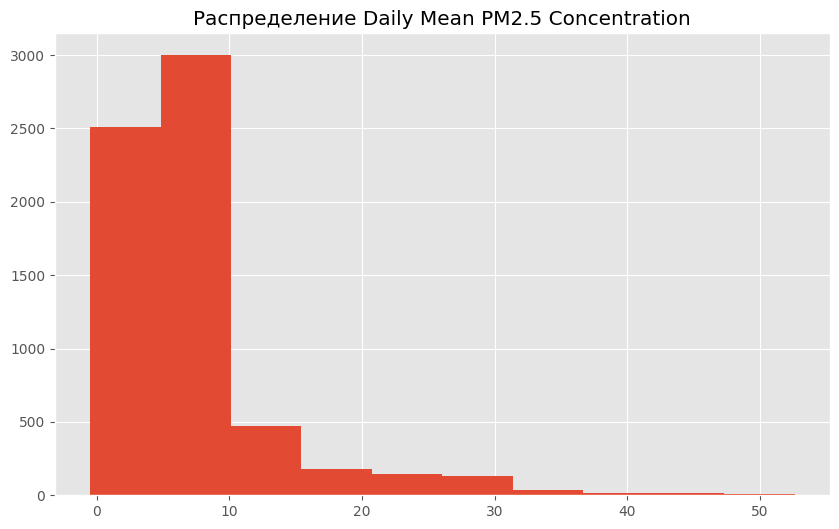

In [10]:
plt.hist(daily_data["Daily Mean PM2.5 Concentration"])
plt.title("Распределение Daily Mean PM2.5 Concentration")
plt.show()

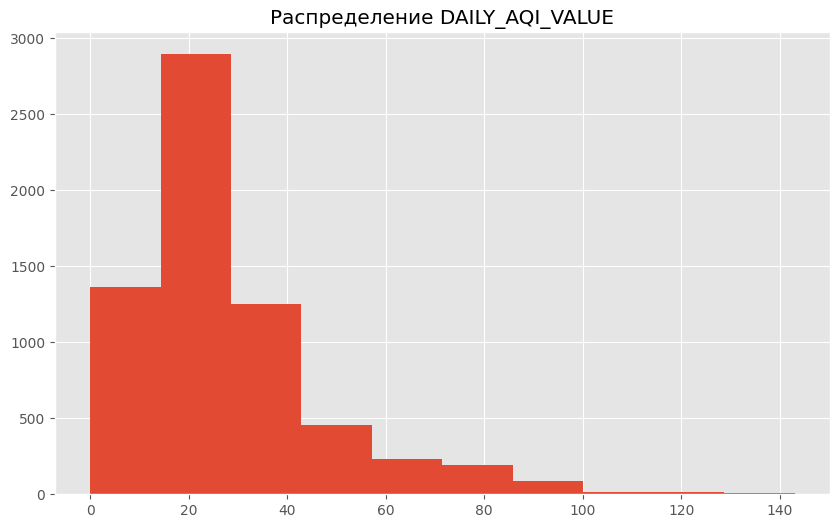

In [11]:
plt.hist(daily_data["DAILY_AQI_VALUE"])
plt.title("Распределение DAILY_AQI_VALUE")
plt.show()

Можно сделать вывод, что в обоих показателях распределение не является нормальным

### Задача 3.1.3. Визуализация данные

1. Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

2. Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.
*Подсказка*: использовать функцию `pandas groupby`.


In [12]:
#Рассчитаем среднее значение для PM2,5
avg_PM = daily_data['Daily Mean PM2.5 Concentration'].groupby(daily_data['Date']).mean()
avg_PM

Date
2023-01-01     3.494444
2023-01-02     2.638889
2023-01-03     9.661111
2023-01-04     7.277778
2023-01-05     2.538889
                ...    
2023-12-27    15.311111
2023-12-28    22.400000
2023-12-29    24.122222
2023-12-30    25.472222
2023-12-31    26.683333
Name: Daily Mean PM2.5 Concentration, Length: 365, dtype: float64

In [13]:
#Преобразуем в датафрейм
df1 = pd.DataFrame(avg_PM)
df1

,Daily Mean PM2.5 Concentration
Date,
2023-01-01,3.494444
2023-01-02,2.638889
2023-01-03,9.661111
2023-01-04,7.277778
2023-01-05,2.538889
...,...
2023-12-27,15.311111
2023-12-28,22.400000
2023-12-29,24.122222


In [14]:
#Рассчитаем среднее значение для AQI
avg_AQI = daily_data['DAILY_AQI_VALUE'].groupby(daily_data['Date']).mean()
avg_AQI

Date
2023-01-01    14.611111
2023-01-02    11.000000
2023-01-03    40.111111
2023-01-04    30.277778
2023-01-05    10.555556
                ...    
2023-12-27    57.722222
2023-12-28    72.666667
2023-12-29    76.222222
2023-12-30    77.888889
2023-12-31    81.722222
Name: DAILY_AQI_VALUE, Length: 365, dtype: float64

In [15]:
#Преобразуем в датафрейм
df2 = pd.DataFrame(avg_AQI)
df2

,DAILY_AQI_VALUE
Date,
2023-01-01,14.611111
2023-01-02,11.000000
2023-01-03,40.111111
2023-01-04,30.277778
2023-01-05,10.555556
...,...
2023-12-27,57.722222
2023-12-28,72.666667
2023-12-29,76.222222


In [16]:
#объединение датафреймов с помощью метода merge()
Result_df = df1.merge(df2, on=['Date'])
Result_df

,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
Date,,
2023-01-01,3.494444,14.611111
2023-01-02,2.638889,11.000000
2023-01-03,9.661111,40.111111
2023-01-04,7.277778,30.277778
2023-01-05,2.538889,10.555556
...,...,...
2023-12-27,15.311111,57.722222
2023-12-28,22.400000,72.666667
2023-12-29,24.122222,76.222222


In [17]:
Result_df.rename(columns={'Daily Mean PM2.5 Concentration':'Среднее по PM2.5', 'DAILY_AQI_VALUE':'Среднее по AQI'}, inplace=True)
Result_df

,Среднее по PM2.5,Среднее по AQI
Date,,
2023-01-01,3.494444,14.611111
2023-01-02,2.638889,11.000000
2023-01-03,9.661111,40.111111
2023-01-04,7.277778,30.277778
2023-01-05,2.538889,10.555556
...,...,...
2023-12-27,15.311111,57.722222
2023-12-28,22.400000,72.666667
2023-12-29,24.122222,76.222222


**Задание №1**

Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

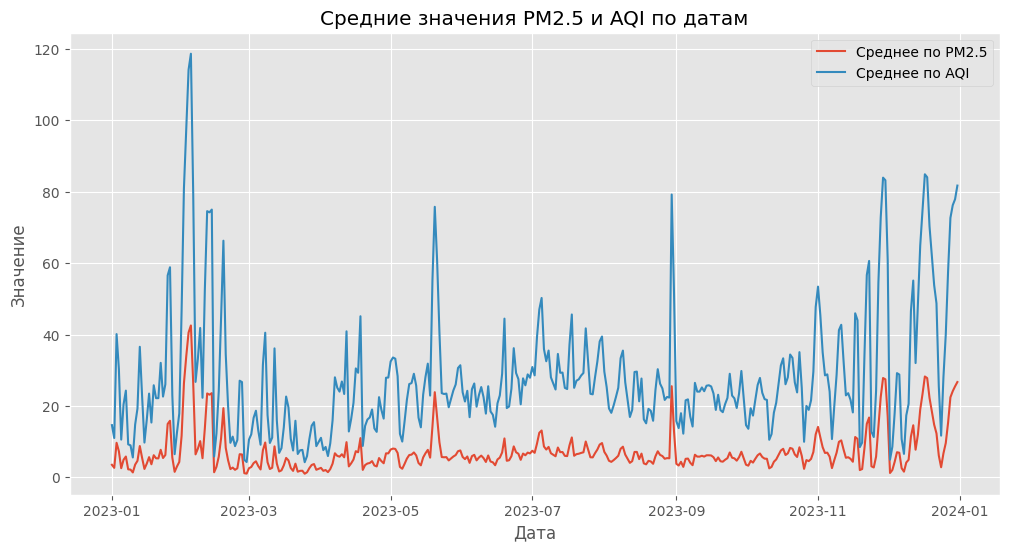

In [18]:
# Создадим график
plt.figure(figsize=(12, 6))
plt.plot(Result_df['Среднее по PM2.5'], label='Среднее по PM2.5')
plt.plot(Result_df['Среднее по AQI'], label='Среднее по AQI')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.xlim()
plt.title('Средние значения PM2.5 и AQI по датам')
plt.legend()
plt.show()

In [19]:
#Преобразуем столбец Date, чтобы обратиться к нему
Result_df = Result_df.reset_index()
Result_df["Date"]

0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
360   2023-12-27
361   2023-12-28
362   2023-12-29
363   2023-12-30
364   2023-12-31
Name: Date, Length: 365, dtype: datetime64[ns]

Определим, в какие дни были максимальные и минимальные показатели

In [20]:
#Определим, в какие дни были минимальные и максимальные показатели по PM2.5
imin = np.argmin(Result_df['Среднее по PM2.5'])
print(Result_df['Date'][imin])
print(Result_df['Среднее по PM2.5'][imin])

imax = np.argmax(Result_df['Среднее по PM2.5'])
print(Result_df['Date'][imax])
print(Result_df['Среднее по PM2.5'][imax])

2023-03-25 00:00:00
0.9944444444444444
2023-02-04 00:00:00
42.53888888888889


In [21]:
#Определим, в какие дни были минимальные и максимальные показатели по AQI
imin = np.argmin(Result_df['Среднее по AQI'])
print(Result_df['Date'][imin])
print(Result_df['Среднее по AQI'][imin])

imax = np.argmax(Result_df['Среднее по AQI'])
print(Result_df['Date'][imax])
print(Result_df['Среднее по AQI'][imax])

2023-03-25 00:00:00
4.222222222222222
2023-02-04 00:00:00
118.66666666666667


**Задание №2**

Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Результаты для обоих участков должны быть на одном рисунке.

In [22]:
# Отфильтруем данные по участкам
indf_490352005 = daily_data[daily_data['Site ID'] == 490352005]
indf_490353015 = daily_data[daily_data['Site ID'] == 490353015]

In [23]:
# Рассчитаем среднее значение по дате для 490352005
avg_490352005 = indf_490352005.groupby(['Site ID', 'Date', 'POC'])['Daily Mean PM2.5 Concentration'].mean().reset_index()
avg_490352005

,Site ID,Date,POC,Daily Mean PM2.5 Concentration
0,490352005,2023-01-01,1,4.6
1,490352005,2023-01-01,4,5.3
2,490352005,2023-01-02,1,4.0
3,490352005,2023-01-02,4,4.1
4,490352005,2023-01-03,1,12.5
...,...,...,...,...
720,490352005,2023-12-29,4,28.6
721,490352005,2023-12-30,1,29.2
722,490352005,2023-12-30,4,29.1
723,490352005,2023-12-31,1,32.1


In [24]:
# Рассчитаем среднее значение по дате для 490353015
avg_490353015 = indf_490353015.groupby(['Site ID', 'Date'])['Daily Mean PM2.5 Concentration'].mean().reset_index()
avg_490353015

,Site ID,Date,Daily Mean PM2.5 Concentration
0,490353015,2023-01-01,3.15
1,490353015,2023-01-02,1.75
2,490353015,2023-01-03,10.75
3,490353015,2023-01-04,8.75
4,490353015,2023-01-05,3.25
...,...,...,...
360,490353015,2023-12-27,13.95
361,490353015,2023-12-28,23.40
362,490353015,2023-12-29,27.85
363,490353015,2023-12-30,28.85


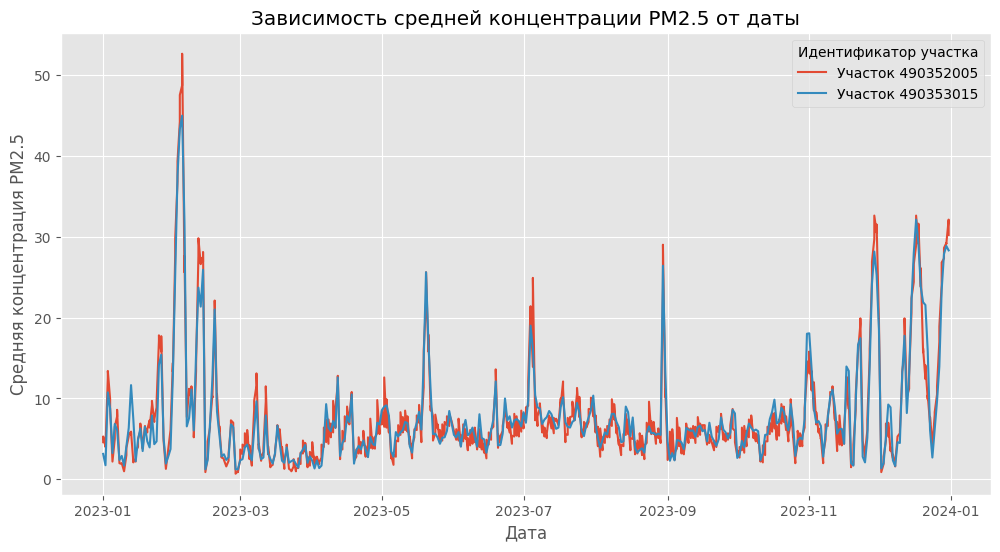

In [25]:
#Построим график
plt.figure(figsize=(12, 6))
plt.plot(avg_490352005['Date'], avg_490352005['Daily Mean PM2.5 Concentration'], label='Участок 490352005')
plt.plot(avg_490353015['Date'], avg_490353015['Daily Mean PM2.5 Concentration'], label='Участок 490353015')
plt.xlabel('Дата')
plt.ylabel('Средняя концентрация PM2.5')
plt.title('Зависимость средней концентрации PM2.5 от даты')
plt.legend(title='Идентификатор участка')
plt.show()

### Задача 3.1.4. Постройте скользящее среднее

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

*Подсказка:* Используйте `rolling()`.

In [26]:
# Рассчитаем усредненное по сайтам и РОС
AQI_mean = daily_data.groupby(['Date','Site ID', 'POC'])['DAILY_AQI_VALUE'].mean().reset_index()
AQI_mean

,Date,Site ID,POC,DAILY_AQI_VALUE
0,2023-01-01,490352005,1,19.0
1,2023-01-01,490352005,4,22.0
2,2023-01-01,490353006,1,18.0
3,2023-01-01,490353006,2,28.0
4,2023-01-01,490353006,4,18.0
...,...,...,...,...
6509,2023-12-31,490353016,1,77.0
6510,2023-12-31,490354002,1,95.0
6511,2023-12-31,490354002,3,92.0
6512,2023-12-31,490450004,1,67.0


In [27]:
AQI_mean1 = AQI_mean.groupby(['Date'])['DAILY_AQI_VALUE'].mean().reset_index()
AQI_mean1

,Date,DAILY_AQI_VALUE
0,2023-01-01,14.611111
1,2023-01-02,11.000000
2,2023-01-03,40.111111
3,2023-01-04,30.277778
4,2023-01-05,10.555556
...,...,...
360,2023-12-27,57.722222
361,2023-12-28,72.666667
362,2023-12-29,76.222222
363,2023-12-30,77.888889


In [31]:
#Рассчитаем скользящее среднее
moving_avg = AQI_mean.groupby('Date')['DAILY_AQI_VALUE'].mean().rolling(window=21).mean().reset_index()
moving_avg

,Date,DAILY_AQI_VALUE
0,2023-01-01,NaN
1,2023-01-02,NaN
2,2023-01-03,NaN
3,2023-01-04,NaN
4,2023-01-05,NaN
...,...,...
360,2023-12-27,44.948024
361,2023-12-28,47.897759
362,2023-12-29,51.215219
363,2023-12-30,54.098817


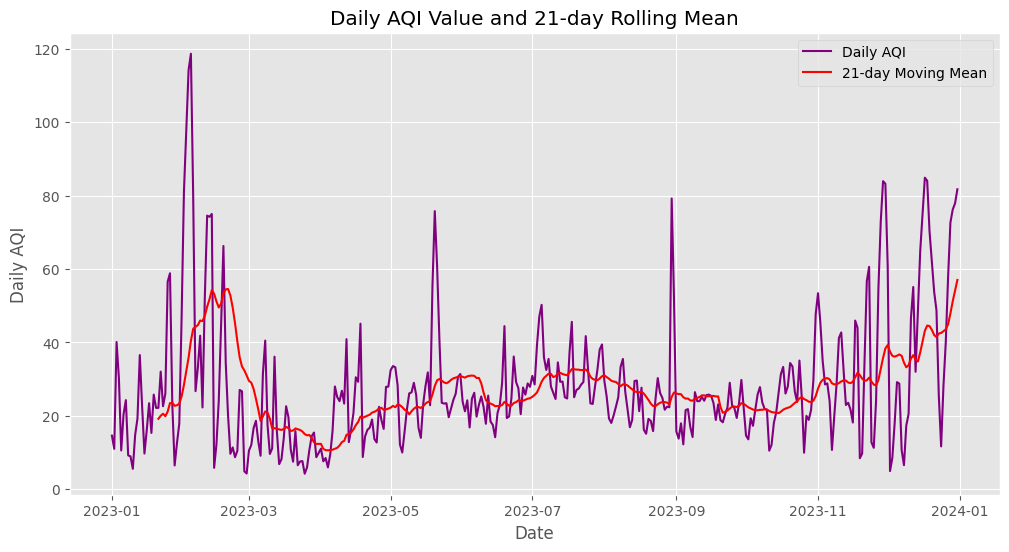

In [32]:
# Построение графика (21 день)
plt.figure(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Daily AQI')
plt.plot(AQI_mean1['Date'], AQI_mean1['DAILY_AQI_VALUE'], label='Daily AQI', color='purple')
plt.plot(moving_avg['Date'], moving_avg['DAILY_AQI_VALUE'], label='21-day Moving Mean', color='red')
plt.title('Daily AQI Value and 21-day Rolling Mean')
plt.legend()
plt.grid(True)
plt.show()

Поэкспериментиуем временными диапазонами

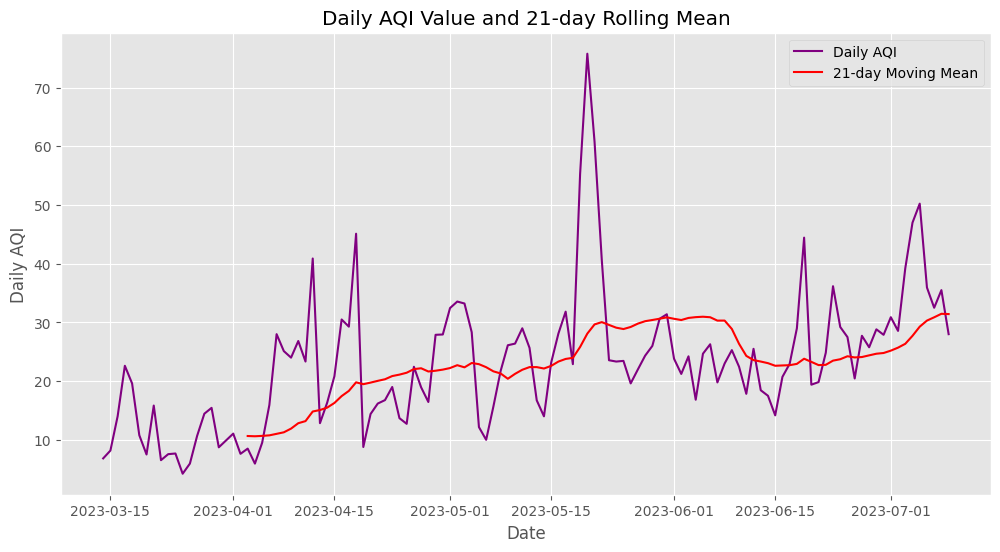

In [36]:
begin = '2023-03-14'
end = '2023-07-09'
diaposon = AQI_mean[(AQI_mean['Date'] >= begin) & (AQI_mean['Date'] <= end)]
Group_diap = diaposon.groupby('Date')['DAILY_AQI_VALUE'].mean()


# Построение графика (21 день)
plt.figure(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Daily AQI')
plt.plot(Group_diap, label='Daily AQI', color='purple')
moving_avg = Group_diap.rolling(window=21).mean()
plt.plot(moving_avg, label='21-day Moving Mean', color='red')
plt.title('Daily AQI Value and 21-day Rolling Mean')
plt.legend()
plt.grid(True)
plt.show()

При выборе ограниченного диапаозона дат, который меньше, чем на первом графике, становится заметнее сдвиг скользящего среднего значения, линия которого становится более плавной

## Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.

H0 (Нулевая гипотеза): ‘Logo B’ просто повезло в тесте, ‘Logo A’ выглядит серьезнее

Ha (Альтернативная гипотеза): ‘Logo B’ лучше

**Ваше решение:**

### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

In [3]:
# Рассчитаем долю кликов по каждому логотипу
Na=3000 #количество рекламных объявлений с логотипом А
Nb=3000 #количество рекламных объявлений с логотипом В
na=800 #количество зрителей, нажавших на рекламу с логотипом А
nb=1000 #количество зрителей, нажавших на рекламу с логотипом В


pa=na/Na #доля кликов по логотипу А

pb=nb/Nb #доля кликов по логотипу В
print(f"Доля кликов по логотипу А: {pa}")
print(f"Доля кликов по логотипу В: {pb}")

Доля кликов по логотипу А: 0.26666666666666666
Доля кликов по логотипу В: 0.3333333333333333


In [4]:
p=(Na/(Na+Nb))*pa+(Nb/(Na+Nb))*pb
q=1-p
print("p =", p)
print("q =", q)

p = 0.3
q = 0.7


In [5]:
#Найдем двухпропорциональное z-значение
from math import sqrt
z=(pa-pb)/sqrt(p*q*((1/Na)+(1/Nb)))
print("z-значение =", z)

z-значение = -5.6343616981901095


### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

In [6]:
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

In [19]:
cdf_value = 1 - norm.cdf(5.6343616981901095)
cdf_value

8.785395078092506e-09

In [20]:
count = [nb, na] #количество успехов
nobs = [Na, Nb] #количество испытаний
z, pval = proportions_ztest(count, nobs, alternative='larger')
print(f"p_proportions_ztest: {pval}")
print("z_value =", z)

p_proportions_ztest: 8.785395076012362e-09
z_value = 5.6343616981901095


По результату проведенного тестирования, значение получилось очень маленьким, что говорит о ложности нулевой гипотезы, значит, логотип В лучше и привлекает больше кликов не по причине везения.